## Vehicle Fraud Insurance XGBoost Classifier Model

In [4]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [6]:
# Loading dataset

df = pd.read_csv("Vehicle_fraud_Insurance_.csv")
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  object 
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  object 
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15420 non-null  object 
 6   MonthClaimed          15420 non-null  object 
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15404 non-null  float64
 11  Fault                 15420 non-null  object 
 12  PolicyType            15420 non-null  object 
 13  VehicleCategory       15412 non-null  object 
 14  VehiclePrice          15420 non-null  object 
 15  FraudFound_P       

In [10]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15404.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855687,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.484418,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [12]:
# Checking for missing values in the dataset

df.isnull().sum()

Month                    0
WeekOfMonth              0
DayOfWeek                0
Make                     0
AccidentArea             0
DayOfWeekClaimed         0
MonthClaimed             0
WeekOfMonthClaimed       0
Sex                      0
MaritalStatus            0
Age                     16
Fault                    0
PolicyType               0
VehicleCategory          8
VehiclePrice             0
FraudFound_P             0
PolicyNumber             0
RepNumber                0
Deductible               0
DriverRating             0
Days_Policy_Accident     0
Days_Policy_Claim        0
PastNumberOfClaims       0
AgeOfVehicle             0
AgeOfPolicyHolder        0
PoliceReportFiled        0
WitnessPresent           0
AgentType                0
NumberOfSuppliments      0
AddressChange_Claim      0
NumberOfCars             0
Year                     0
BasePolicy               0
dtype: int64

In [14]:
# Checking for duplicate values

df.duplicated().sum()

0

In [16]:
# Checking for unique values

df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [18]:
for column in df:
    print(column,":\n",df[column].unique(),'\n')

Month :
 ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep'] 

WeekOfMonth :
 [5 3 2 4 1] 

DayOfWeek :
 ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday'] 

Make :
 ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus'] 

AccidentArea :
 ['Urban' 'Rural'] 

DayOfWeekClaimed :
 ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0'] 

MonthClaimed :
 ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0'] 

WeekOfMonthClaimed :
 [1 4 2 3 5] 

Sex :
 ['Female' 'Male'] 

MaritalStatus :
 ['Single' 'Married' 'Widow' 'Divorced'] 

Age :
 [21. 34. 47. 65. 27. 20. 36.  0. 30. 42. 71. 52. 28. nan 61. 38. 41. 32.
 40. 63. 31. 45. 60. 39. 55. 35. 44. 72. 29. 37. 59. 49. 50. 26. 48. 64.
 33. 74. 23. 25. 56. 16. 68. 18. 51. 22. 53. 46. 43. 57. 54. 69. 67. 19.
 78. 77. 75. 80. 58. 73. 24. 76. 62. 79.

### Exploratory Data Analysis

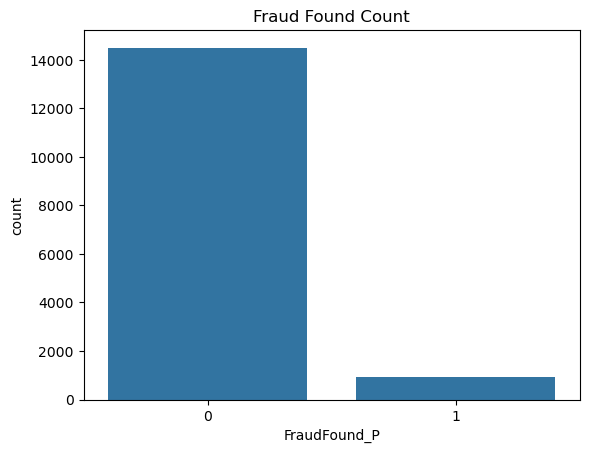

In [21]:
# Target variable distribution

sns.countplot(x = "FraudFound_P", data = df)
plt.title("Fraud Found Count")
plt.show()

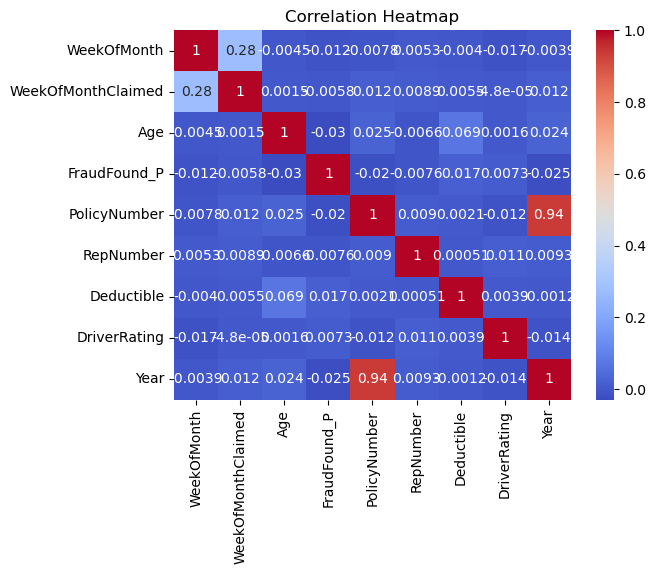

In [23]:
# Correlation plot for numerical features

numerics = df.select_dtypes(include = ['int64','float64'])
sns.heatmap(numerics.corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

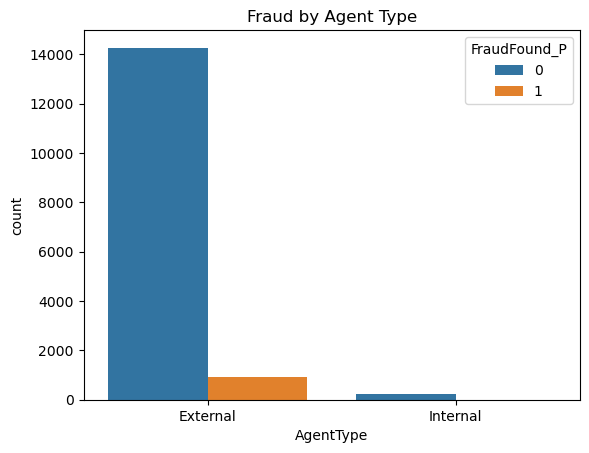

In [25]:
# Visualize fraud by agent type

sns.countplot(data = df, x = 'AgentType', hue = 'FraudFound_P')
plt.title('Fraud by Agent Type')
plt.show()

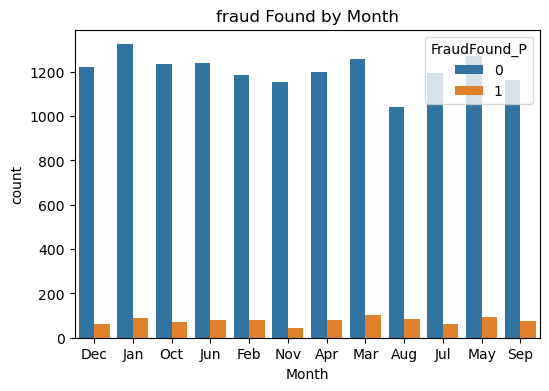

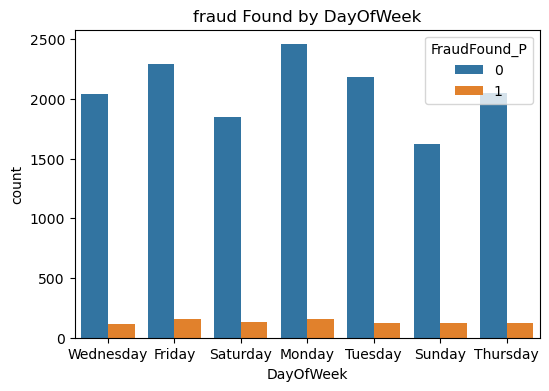

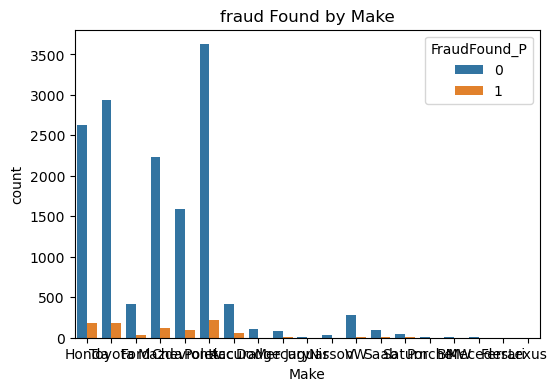

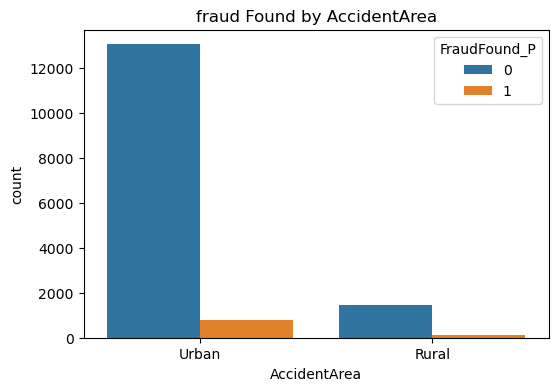

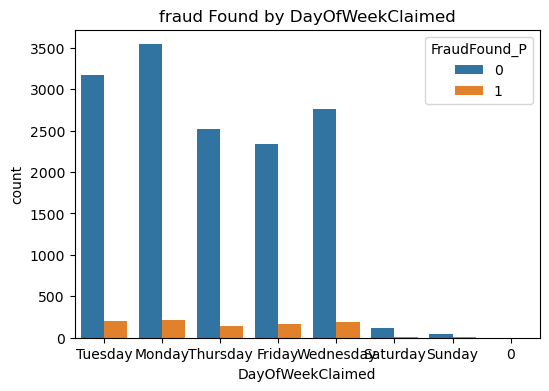

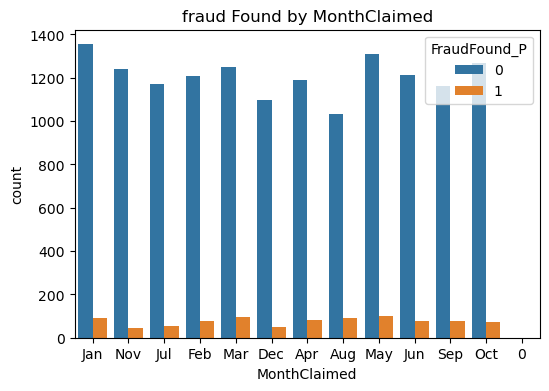

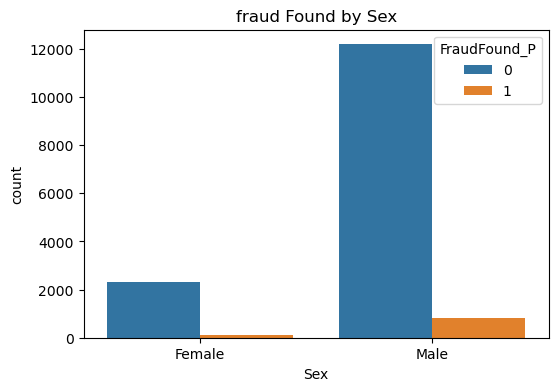

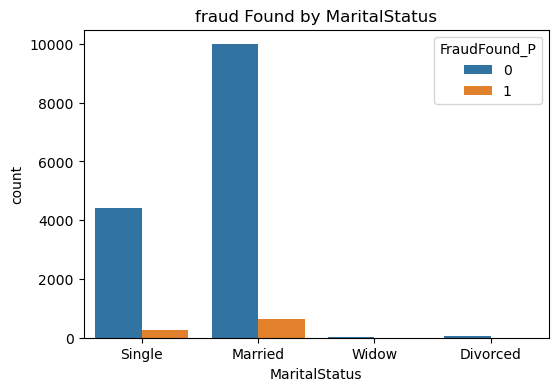

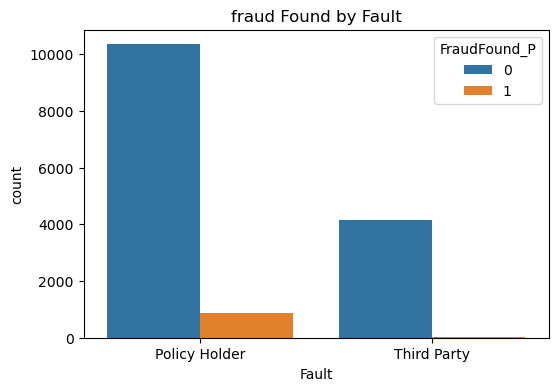

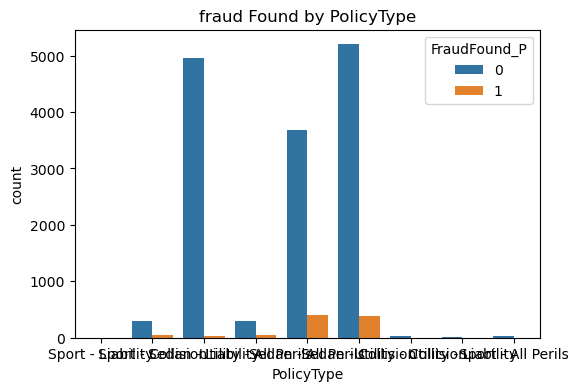

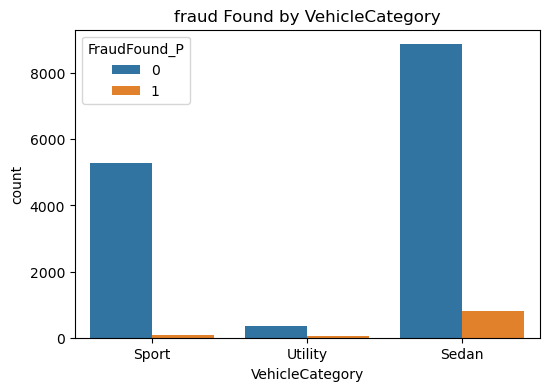

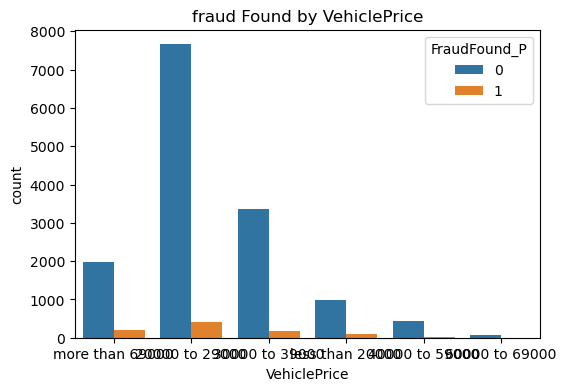

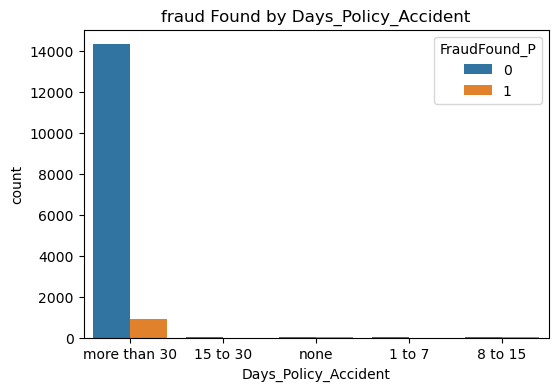

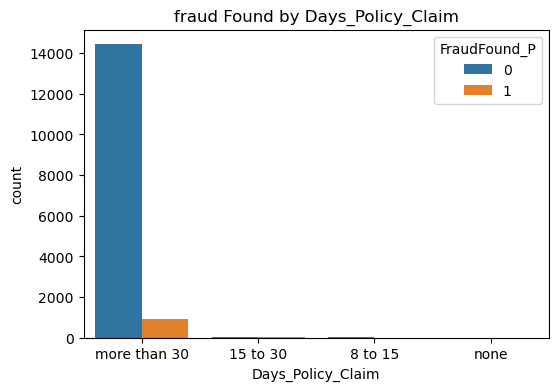

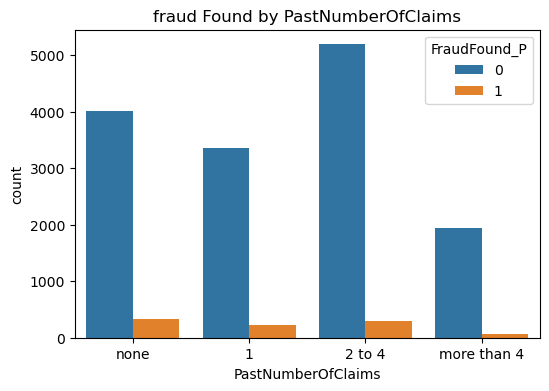

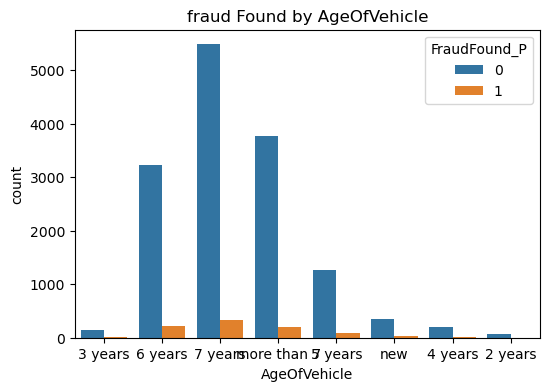

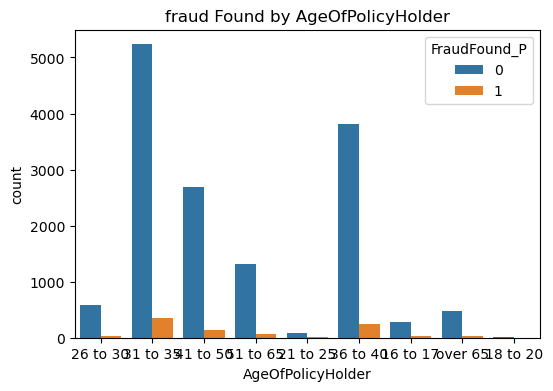

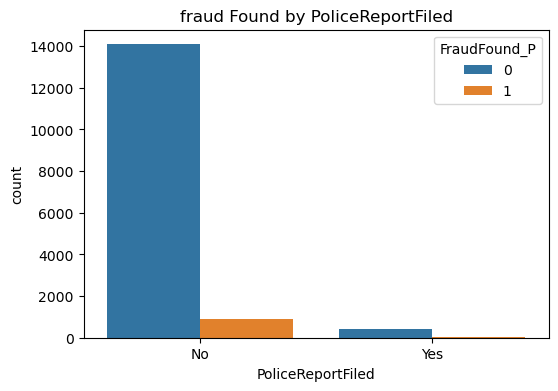

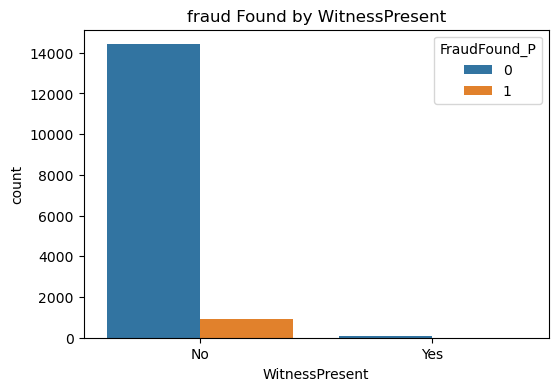

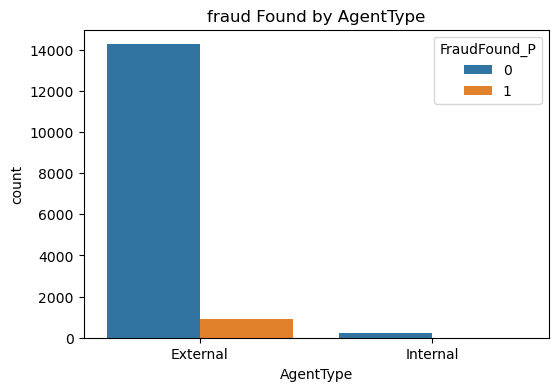

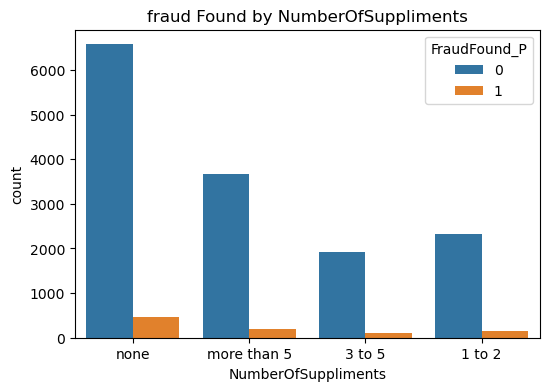

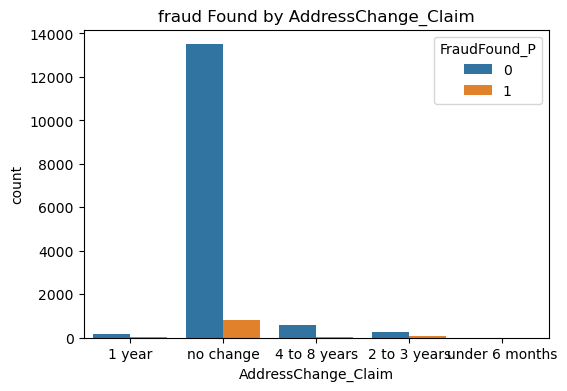

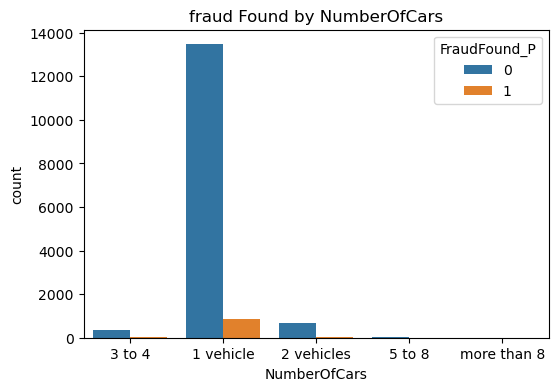

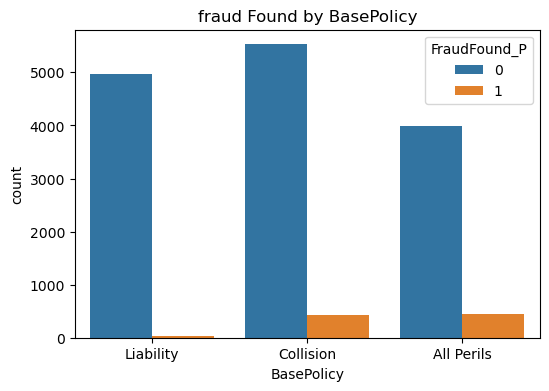

In [27]:
# Analysing target vs. Categorical Columns

categorical_cols = df.select_dtypes(include = 'object').columns

for col in categorical_cols:
    plt.figure(figsize = (6,4))
    sns.countplot(data = df, x = col, hue = 'FraudFound_P')
    plt.title(f"fraud Found by {col}")
    plt.show()

#### This shows how fraud is distributed across categories like Month, Day of Week, Make, Accident Area, Sex, Marital status etc.

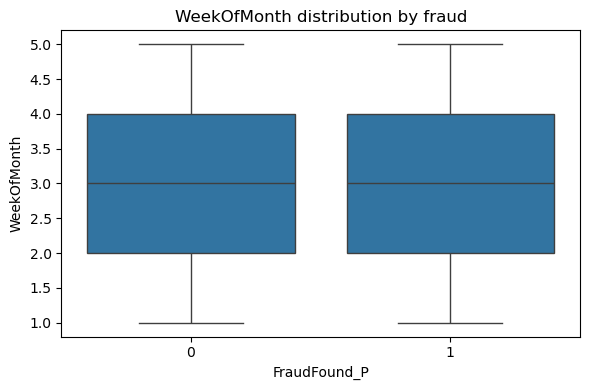

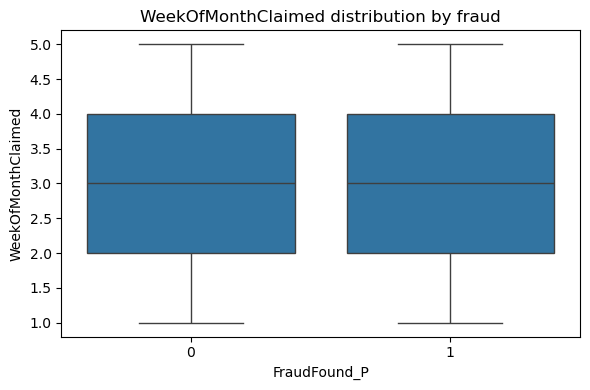

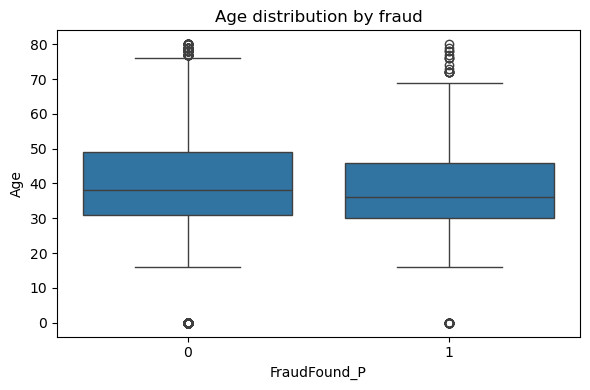

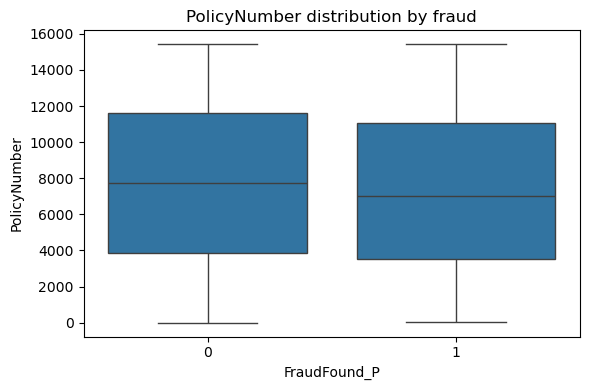

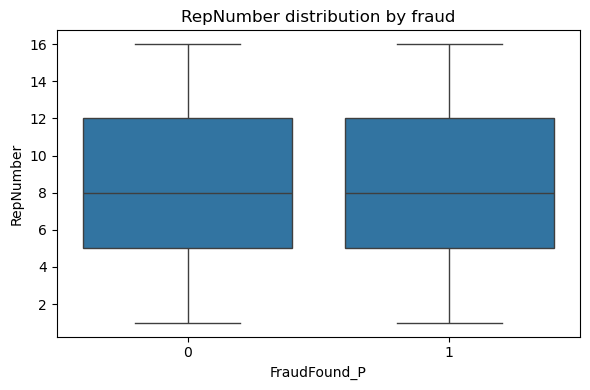

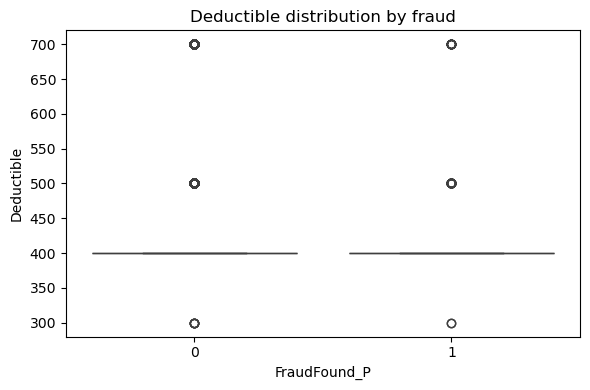

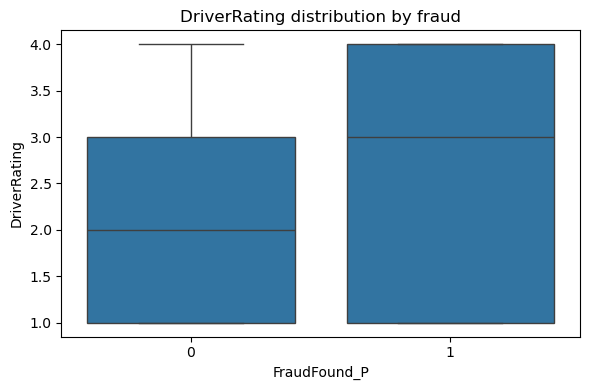

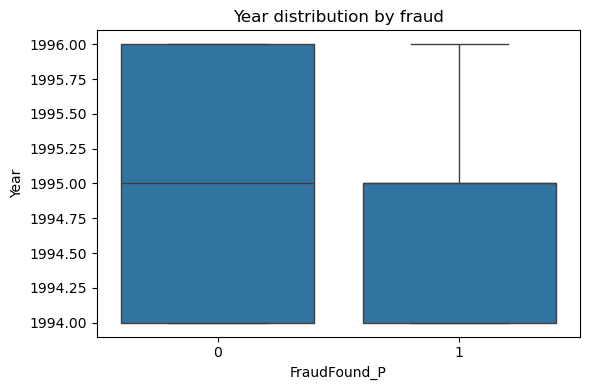

In [30]:
# Analyse target vs. numerical features

numerical_cols = df.select_dtypes(include = ['int64','float64']).columns.drop('FraudFound_P')

for col in numerical_cols:
    plt.figure(figsize = (6,4))
    sns.boxplot(data = df, x = 'FraudFound_P', y = col)
    plt.title(f"{col} distribution by fraud")
    plt.tight_layout()
    plt.show()

#### This will help us to find out outliers across the features.

In [33]:
# Average fraud per category

for col in categorical_cols:
    fraud_rate = df.groupby(col)['FraudFound_P'].mean().sort_values(ascending = False)
    print(f"\nFraud rate by {col}:\n", fraud_rate)


Fraud rate by Month:
 Month
Mar    0.075000
Aug    0.074534
May    0.068764
Feb    0.064771
Apr    0.062500
Jan    0.061658
Sep    0.061290
Jun    0.060560
Oct    0.053640
Dec    0.048249
Jul    0.047733
Nov    0.038301
Name: FraudFound_P, dtype: float64

Fraud rate by DayOfWeek:
 DayOfWeek
Sunday       0.069914
Saturday     0.066599
Friday       0.062986
Monday       0.061162
Thursday     0.055223
Wednesday    0.053265
Tuesday      0.052174
Name: FraudFound_P, dtype: float64

Fraud rate by Make:
 Make
Mecedes      0.250000
Accura       0.125000
Saturn       0.103448
Saab         0.101852
Ford         0.073333
Mercury      0.072289
BMW          0.066667
Honda        0.063906
Toyota       0.059596
Chevrolet    0.055919
Pontiac      0.055512
Mazda        0.052251
Nisson       0.033333
VW           0.028269
Dodge        0.018349
Lexus        0.000000
Porche       0.000000
Jaguar       0.000000
Ferrari      0.000000
Name: FraudFound_P, dtype: float64

Fraud rate by AccidentArea:
 Accident

#### This will help us to understand which categories are more prone to fraud

### Data Preprocessing

In [39]:
df.drop(columns = ['RepNumber','Deductible','WitnessPresent'], inplace = True)
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [41]:
# Correcting missing value from Age and Vehicle category column by using dropna function

df.dropna(subset = ['Age', 'VehicleCategory'], inplace = True)
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [43]:
# Encode categorical features

le = LabelEncoder()
for col in df.select_dtypes(include = 'object').columns:
    df[col] = le.fit_transform(df[col])

In [45]:
# Checking encoding columns

print("First 5 rows after encoding:")
print(df.head(5))

First 5 rows after encoding:
   Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0      2            5          6     6             1                 6   
1      4            3          6     6             1                 2   
2     10            5          0     6             1                 5   
3      6            2          2    17             0                 1   
4      4            5          1     6             1                 6   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  \
0             5                   1    0              2  ...   
1             5                   4    1              2  ...   
2            10                   2    1              1  ...   
3             6                   1    1              1  ...   
4             4                   2    0              2  ...   

   PastNumberOfClaims  AgeOfVehicle  AgeOfPolicyHolder  PoliceReportFiled  \
0                   3             1                  3          

### Splitting Dataset

In [48]:
X = df.drop("FraudFound_P", axis = 1)
y = df["FraudFound_P"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,random_state = 42)

X_train

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
4936,0,3,0,6,1,7,1,3,1,1,...,3,4,4,0,0,3,3,0,1994,1
9457,3,4,6,6,1,4,8,2,1,1,...,3,4,4,0,0,3,3,0,1995,0
12979,2,2,2,17,0,2,3,3,1,1,...,3,6,6,0,0,3,3,0,1996,0
12153,7,4,2,2,1,5,1,3,1,1,...,3,5,4,0,0,2,3,0,1996,0
9434,1,2,4,9,1,1,2,2,0,1,...,1,4,4,0,0,1,3,0,1995,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851,11,3,3,2,1,5,11,1,1,2,...,1,5,5,0,0,1,3,0,1995,0
2616,8,2,5,17,1,5,9,2,1,2,...,1,4,4,0,0,0,3,0,1994,2
4385,6,1,4,9,1,1,6,3,0,2,...,0,3,3,0,0,3,3,0,1994,0
11850,9,2,3,13,1,6,10,3,0,2,...,0,4,4,0,0,3,3,0,1996,1


In [50]:
X_test

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
8858,5,2,3,2,1,2,6,2,1,1,...,1,5,6,0,0,1,3,0,1995,2
12474,4,2,3,2,1,5,5,2,1,1,...,3,5,6,0,0,2,2,1,1996,1
7562,0,5,3,9,1,5,9,4,1,2,...,1,4,4,0,0,3,3,0,1995,1
2555,5,4,4,9,0,6,2,1,1,2,...,3,3,4,0,0,3,3,0,1994,1
7479,0,2,2,9,1,1,1,3,0,2,...,1,4,4,0,0,0,3,0,1995,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11164,9,5,5,17,1,6,3,4,1,2,...,0,4,4,0,0,3,3,0,1995,0
2904,1,1,0,13,1,6,2,2,0,2,...,2,4,4,0,0,2,3,0,1994,2
2139,5,1,4,6,1,1,6,2,1,1,...,3,6,7,0,0,3,3,0,1994,1
10821,1,4,2,6,1,1,11,2,1,1,...,1,4,4,0,0,2,3,0,1995,2


### Scaling

In [53]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [55]:
X_train_scale

array([[-1.62927874,  0.16324028, -1.42481059, ..., -0.25322462,
        -1.0720364 , -0.04769452],
       [-0.74748066,  0.94008238,  1.49993186, ..., -0.25322462,
         0.17425398, -1.32466335],
       [-1.04141335, -0.61360181, -0.44989644, ..., -0.25322462,
         1.42054437, -1.32466335],
       ...,
       [ 0.13431741, -1.39044391,  0.52501771, ..., -0.25322462,
        -1.0720364 , -1.32466335],
       [ 1.01611548, -0.61360181,  0.03756063, ..., -0.25322462,
         1.42054437, -0.04769452],
       [ 1.31004817,  0.94008238,  0.52501771, ..., -0.25322462,
         0.17425398,  1.22927432]])

In [57]:
X_test_scale

array([[-0.15961528, -0.61360181,  0.03756063, ..., -0.25322462,
         0.17425398,  1.22927432],
       [-0.45354797, -0.61360181,  0.03756063, ...,  2.39199544,
         1.42054437, -0.04769452],
       [-1.62927874,  1.71692448,  0.03756063, ..., -0.25322462,
         0.17425398, -0.04769452],
       ...,
       [-0.15961528, -1.39044391,  0.52501771, ..., -0.25322462,
        -1.0720364 , -0.04769452],
       [-1.33534605,  0.94008238, -0.44989644, ..., -0.25322462,
         0.17425398,  1.22927432],
       [ 1.31004817,  0.94008238, -0.93735352, ..., -0.25322462,
        -1.0720364 ,  1.22927432]])

### Model Building and Evaluation

In [60]:
!pip install Xgboost

In [64]:
# Calculate ratio of non-fraud to fraud

neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos

In [68]:
# Train XGBoost model

model = XGBClassifier(
    scale_pos_weight = scale_pos_weight,
    random_state = 42
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [70]:
# Prediction

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [72]:
# Evaluation

print("Classification report:")
print(classification_report(y_test, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2896
           1       0.65      0.78      0.71       184

    accuracy                           0.96      3080
   macro avg       0.82      0.88      0.84      3080
weighted avg       0.97      0.96      0.96      3080

Confusion matrix:
[[2819   77]
 [  41  143]]


In [76]:
from sklearn.metrics import roc_auc_score

print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred))

ROC AUC Score:
0.8752927576267115


In [80]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predicted probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Define thresholds to test
thresholds = np.arange(0.1, 0.91, 0.05)


In [82]:
# Store metrics
precisions = []
recalls = []
f1_scores = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_t))
    recalls.append(recall_score(y_test, y_pred_t))
    f1_scores.append(f1_score(y_test, y_pred_t))

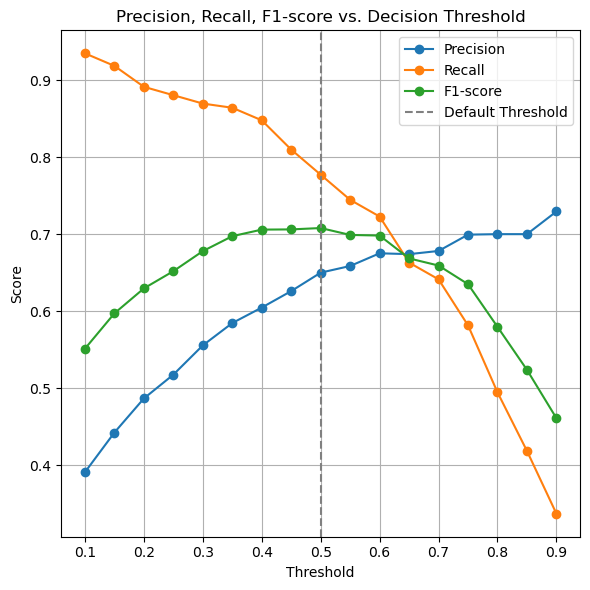

In [84]:
# Plot
plt.figure(figsize=(6, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1-score', marker='o')
plt.axvline(0.5, color='gray', linestyle='--', label='Default Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, F1-score vs. Decision Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [86]:
y_pred_custom = (y_proba >= 0.3).astype(int)
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2896
           1       0.56      0.87      0.68       184

    accuracy                           0.95      3080
   macro avg       0.77      0.91      0.83      3080
weighted avg       0.97      0.95      0.96      3080



In [88]:
# Final evaluation at chosen threshold (e.g., 0.3)

chosen_threshold = 0.3
y_pred_final = (y_proba >= chosen_threshold).astype(int)

print(f"Evaluation at Threshold = {chosen_threshold}")
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Evaluation at Threshold = 0.3
[[2768  128]
 [  24  160]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2896
           1       0.56      0.87      0.68       184

    accuracy                           0.95      3080
   macro avg       0.77      0.91      0.83      3080
weighted avg       0.97      0.95      0.96      3080

ROC AUC Score: 0.9708574795820323


In [90]:
# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)

# Calculate AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)


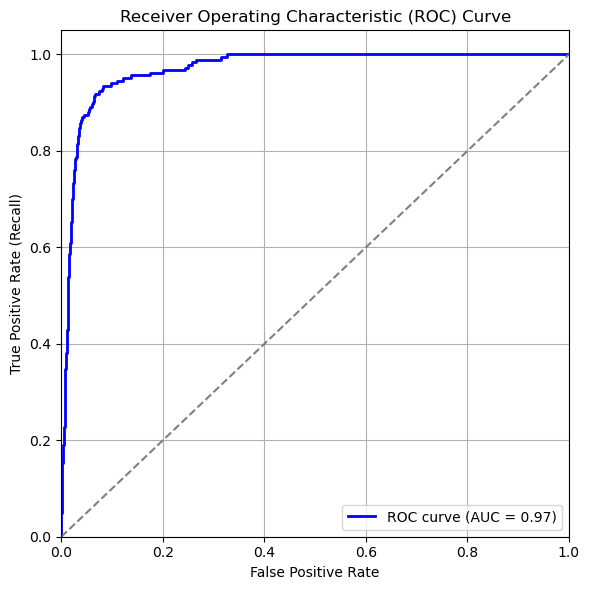

In [92]:
# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()